In [1]:
#ONLY FINAL CODE------------------------------------------------------------
import cv2
import numpy as np
import os
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import PIL
import tensorflow as tf
import os
import math
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from IPython.display import display
import io
from PIL import Image

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# ------------------------------ CHANGES WITHIN THE CODE DENOTED BY DASHES

In [3]:
#im = Image.open(i)
#im.save('new1.png')
IMAGE_PATH = "images.png"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1" #ALGO

In [4]:
def preprocess_image(image_path):
  
  hr_image = tf.image.decode_image(tf.io.read_file(image_path)) #Image is decoded and its datatype and number of channels can be changed
  
  if hr_image.shape[-1] == 3:  #.REDUCING CHANNELS CAN VARY RESULTS FOR DIFF IMAGES
    #hr_image = hr_image[...,:-1]   #REDUCING CHANNELS CODE IS COMMENTED OUT-------------------------
    hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4   #convert to tensor
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1]) #limit image to a box
    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)   #limit colors min and max value
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())  #cast meaning converting to int format
  image.save("%s.png" % filename)   #CHANGED FILE FORMAT TO PNG-------------------
  print("Saved as %s.png" % filename)

In [5]:
%matplotlib inline
def plot_image(image, title=""):
  
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title('TITLE')

In [6]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as Original Image.png


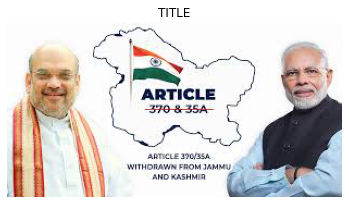

In [7]:
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [8]:
model = hub.load(SAVED_MODEL_PATH)   #ALGORITHM

In [9]:
fake_image = model(hr_image)           #ALGORITHM
fake_image = tf.squeeze(fake_image)

Saved as Super Resolution.png


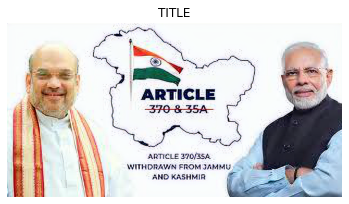

In [10]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution") #squeeze eliminates all the values within the tensor with magnitude 1

In [11]:
import pytesseract as tess
import cv2
import PIL
import easyocr

In [12]:
#SUPERRESOLUTION IMAGE
img = cv2.imread('/home/mes-am/upyter/Super Resolution.png')  #(h,w,channels) : (640,1232,3)  
#ROI IMAGE
img_cropped = img[100:300,400:800]   #roi = img[y1:y2,x1:x2]
#ROI IMAGE being SAVED IN (Super resolution text roi.png)
cv2.imwrite('/home/mes-am/upyter/Super Resolution text roi.png',img_cropped)

True

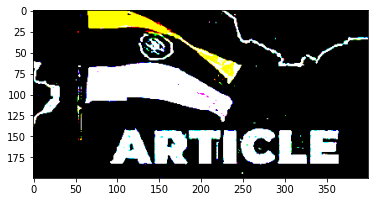

In [13]:
img = cv2.imread('/home/mes-am/upyter/Super Resolution text roi.png')
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_,th1 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
_,th2 = cv2.threshold(th1,0,255,cv2.THRESH_BINARY_INV)
#ADAPTIVE THRESHOLD
#th3 = cv2.adaptiveThreshold(grayimg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 #                           cv2.THRESH_BINARY,11,2)
#OTSU THRESHOLD
#blur = cv2.GaussianBlur(grayimg,(5,5),0)
#ret3,th4 = cv2.threshold(blur,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('/home/mes-am/upyter/Super Resolution TOZERO.png',th2)
plt.imshow(th2)

In [14]:
reader = easyocr.Reader(['en']) 
result = reader.readtext('/home/mes-am/upyter/Super Resolution TOZERO.png',detail=0)
print(result)

['ARTICLE']
